In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 

# File to Load
spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333


In [2]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [3]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [4]:
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107,F#


In [5]:
#Categorize and Establish Bins for Popularity
size_bins = (0, 25, 50, 75, 100)
labels = ['Least Popular (>25)', 'Low to Mid Popular (25-50)','Mid to High Popular (50-75)','Most Popular (75-100)']

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])
#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (>25),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (>25),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (>25),1960,Christmas Soul,r&b,neo soul,7,G,-6.295,119.117,142547
At Last - Single Version,Etta James,15,Least Popular (>25),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (50-75),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (>25),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (25-50),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (>25),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404,156.308,235107


In [6]:
#Key Data
#Drop un-needed columns
key_df = spotify_df.drop(columns={'Release Date', 'Playlist Name', 'Genre',
                         'Subgenre', 'Loudness', 'Tempo', 'Duration (ms)'})
#Print data frame
key_df

,Artist,Popularity,Popularity Sectors,Key,Key Assignment
Track Name,,,,,
At Last - Single Version,Etta James,25,Least Popular (>25),5,F
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (>25),11,B
Jingle Bells,Ella Fitzgerald,11,Least Popular (>25),7,G
At Last - Single Version,Etta James,15,Least Popular (>25),5,F
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (50-75),10,A#
...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (>25),3,D#
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (25-50),0,C
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (>25),6,F#


In [7]:
#Group and Count each letter in Key Assignment
key_group = key_df.groupby(['Key Assignment']).size()
key_group

Key Assignment
A     3027
A#    2273
B     2996
C     3454
C#    4010
D     2827
D#     913
E     2201
F     2680
F#    2670
G     3352
G#    2430
dtype: int64

In [8]:
key_group_2 = key_df.groupby(['Popularity Sectors'])['Key Assignment'].value_counts()
key_group_2 =pd.DataFrame(key_group_2)
key_group_2 = key_group_2.sort_values('Key Assignment')

key_group_2

count
Popularity Sectors          Key Assignment       
Low to Mid Popular (25-50)  A                 955
Mid to High Popular (50-75) A                1045
Least Popular (>25)         A                 504
Most Popular (75-100)       A                 239
                            A#                207
Mid to High Popular (50-75) A#                791
Low to Mid Popular (25-50)  A#                694
Least Popular (>25)         A#                375
                            B                 509
Low to Mid Popular (25-50)  B                 959
Most Popular (75-100)       B                 270
Mid to High Popular (50-75) B                 989
Low to Mid Popular (25-50)  C                1093
Most Popular (75-100)       C                 264
Least Popular (>25)         C                 629
Mid to High Popular (50-75) C                1229
Least Popular (>25)         C#                723
Low to Mid Popular (25-50)  C#               1241
Most Popular (75-100)       C#                347
Mid to High Popular (50-75) C#               1390
                            D                 927
Most Popular (75-100)       D                 208
Least Popular (>25)         D                 521
Low to Mid Popular (25-50)  D                 929
Mid to High Popular (50-75) D#                299
Low to Mid Popular (25-50)  D#                307
Least Popular (>25)         D#                178
Most Popular (75-100)       D#                 60
                            E                 175
Mid to High Popular (50-75) E                 762
Low to Mid Popular (25-50)  E                 667
Least Popular (>25)         E                 395
Mid to High Popular (50-75) F                 958
Low to Mid Popular (25-50)  F                 810
Most Popular (75-100)       F                 214
Least Popular (>25)         F                 466
Mid to High Popular (50-75) F#                919
Low to Mid Popular (25-50)  F#                828
Most Popular (75-100)       F#                221
Least Popular (>25)         F#                491
Mid to High Popular (50-75) G                1068
Low to Mid Popular (25-50)  G                1068
Most Popular (75-100)       G                 252
Least Popular (>25)         G                 689
Most Popular (75-100)       G#                204
Low to Mid Popular (25-50)  G#                743
Mid to High Popular (50-75) G#                924
Least Popular (>25)         G#                394

In [9]:
key_group_3=key_group_2.loc['Low to Mid Popular (25-50)']
key_group_3= (key_group_3['count']) / (key_group_3['count'].sum()) * 100
key_group_3


Key Assignment
A      9.277249
A#     6.741791
B      9.316106
C     10.617836
C#    12.055566
D      9.024675
D#     2.982320
E      6.479503
F      7.868661
F#     8.043520
G     10.374976
G#     7.217797
Name: count, dtype: float64

In [10]:
key_group_4=key_group_2.loc['Mid to High Popular (50-75)']
key_group_4= (key_group_4['count']) / (key_group_4['count'].sum()) * 100
key_group_4

Key Assignment
A      9.246969
A#     6.999381
B      8.751438
C     10.875144
C#    12.299796
D      8.202814
D#     2.645784
E      6.742766
F      8.477126
F#     8.132024
G      9.450491
G#     8.176268
Name: count, dtype: float64

In [11]:
key_group_5=key_group_2.loc['Least Popular (>25)']
key_group_5= (key_group_5['count']) / (key_group_5['count'].sum()) * 100
key_group_5

Key Assignment
A      8.580184
A#     6.384065
B      8.665305
C     10.708206
C#    12.308478
D      8.869595
D#     3.030303
E      6.724549
F      7.933265
F#     8.358870
G     11.729656
G#     6.707525
Name: count, dtype: float64

In [12]:
key_group_6=key_group_2.loc['Most Popular (75-100)']
key_group_6= (key_group_6['count']) / (key_group_6['count'].sum()) * 100
key_group_6

Key Assignment
A      8.981586
A#     7.779030
B     10.146561
C      9.921082
C#    13.040210
D      7.816610
D#     2.254791
E      6.576475
F      8.042089
F#     8.305148
G      9.470124
G#     7.666291
Name: count, dtype: float64

In [13]:
key_popularity = pd.DataFrame({"Most Popular (75-100)": key_group_6,
                       "Mid to High Popular (50-75)": key_group_4,
                       "Low to Mid Popular ( 25-50)": key_group_3,
                       "Least Popular (>25)": key_group_5})   
pd.options.display.float_format = '{:.3f}%'.format

key_popularity.head()

,Most Popular (75-100),Mid to High Popular (50-75),Low to Mid Popular ( 25-50),Least Popular (>25)
Key Assignment,,,,
A,8.982%,9.247%,9.277%,8.580%
A#,7.779%,6.999%,6.742%,6.384%
B,10.147%,8.751%,9.316%,8.665%
C,9.921%,10.875%,10.618%,10.708%
C#,13.040%,12.300%,12.056%,12.308%


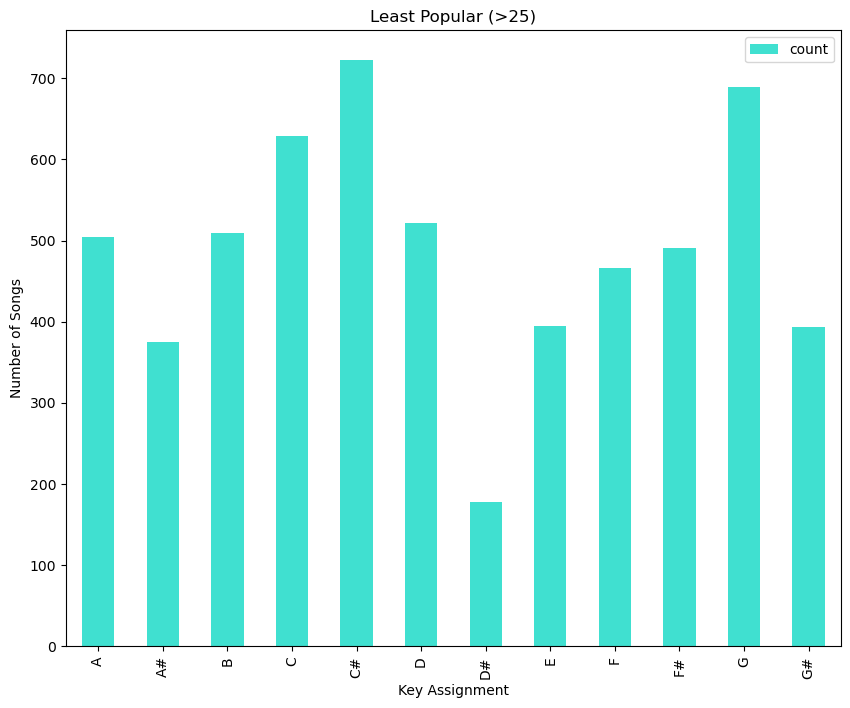

In [14]:
bar_5= key_group_2.loc['Least Popular (>25)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Least Popular (>25)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='turquoise')
plt.show()

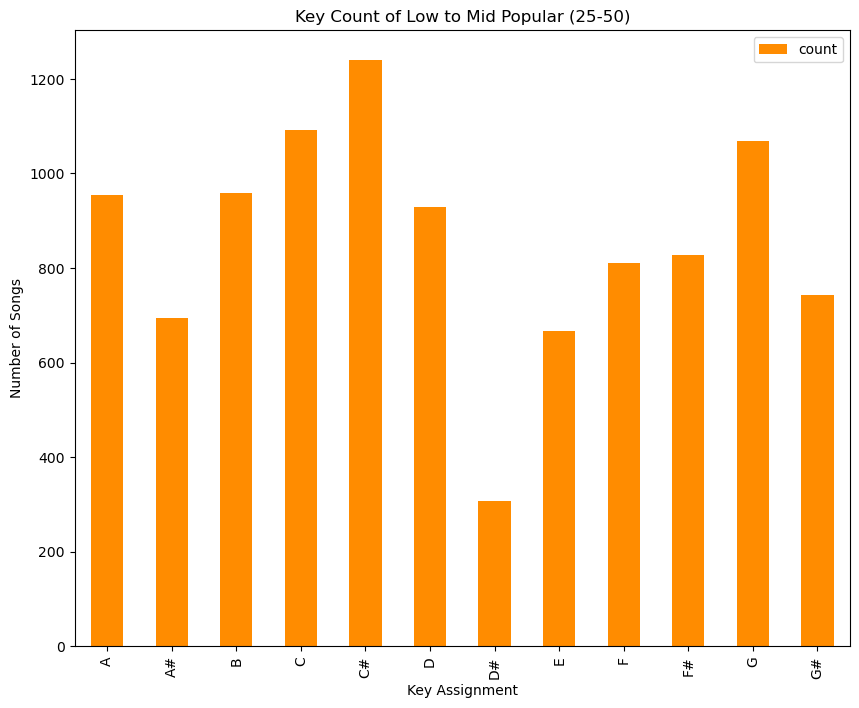

In [15]:
bar_4= key_group_2.loc['Low to Mid Popular (25-50)']
bar_4.plot(kind='bar', figsize=(10,8), title= 'Key Count of Low to Mid Popular (25-50)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='darkorange')
plt.show()

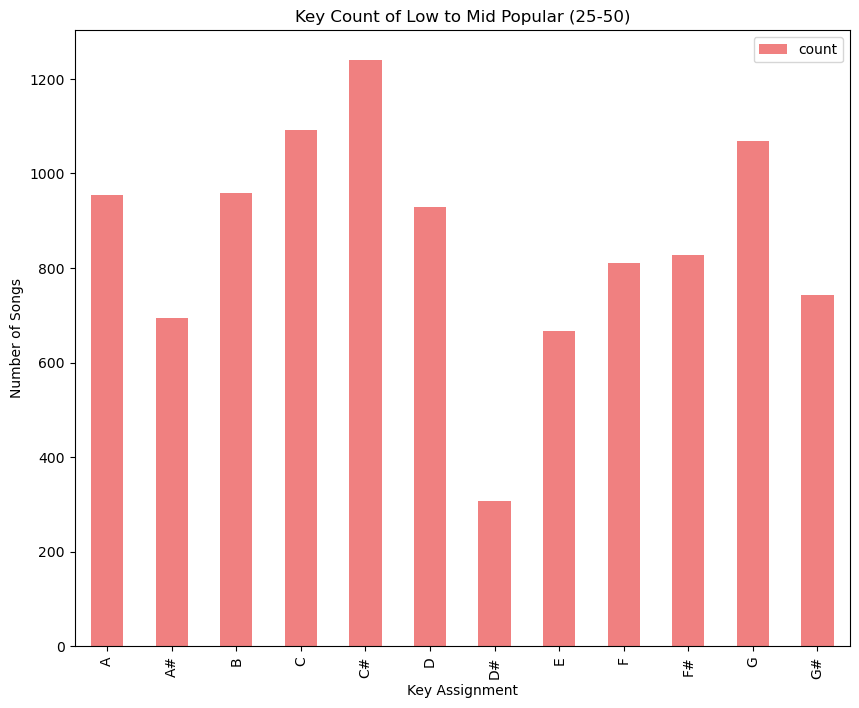

In [16]:
bar_3= key_group_2.loc['Low to Mid Popular (25-50)']
bar_3.plot(kind='bar', figsize=(10,8), title= 'Key Count of Low to Mid Popular (25-50)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='lightcoral')
plt.show()

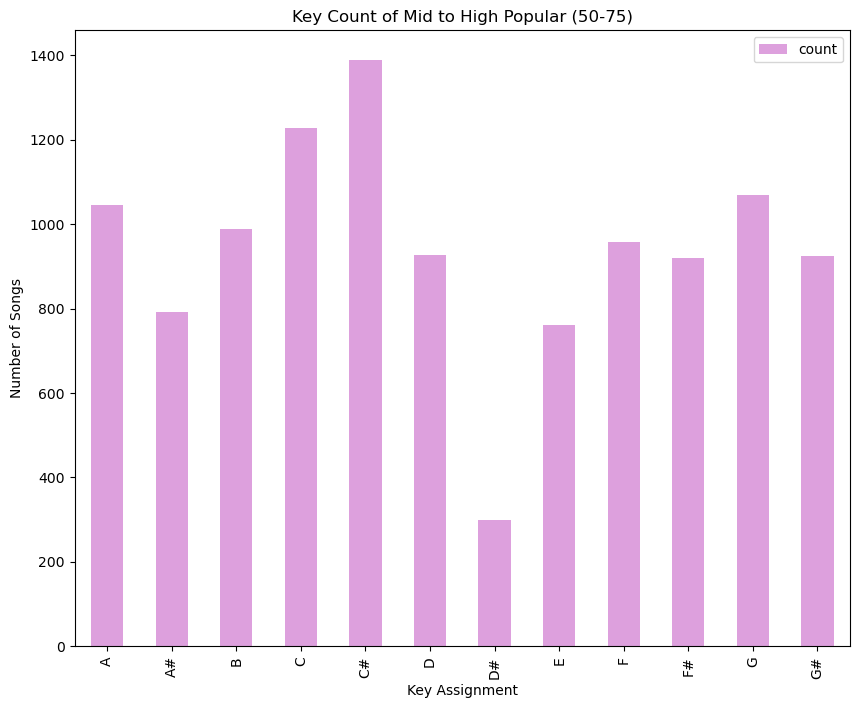

In [17]:
bar_2= key_group_2.loc['Mid to High Popular (50-75)']
bar_2.plot(kind='bar', figsize=(10,8), title= 'Key Count of Mid to High Popular (50-75)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='plum')
plt.show()

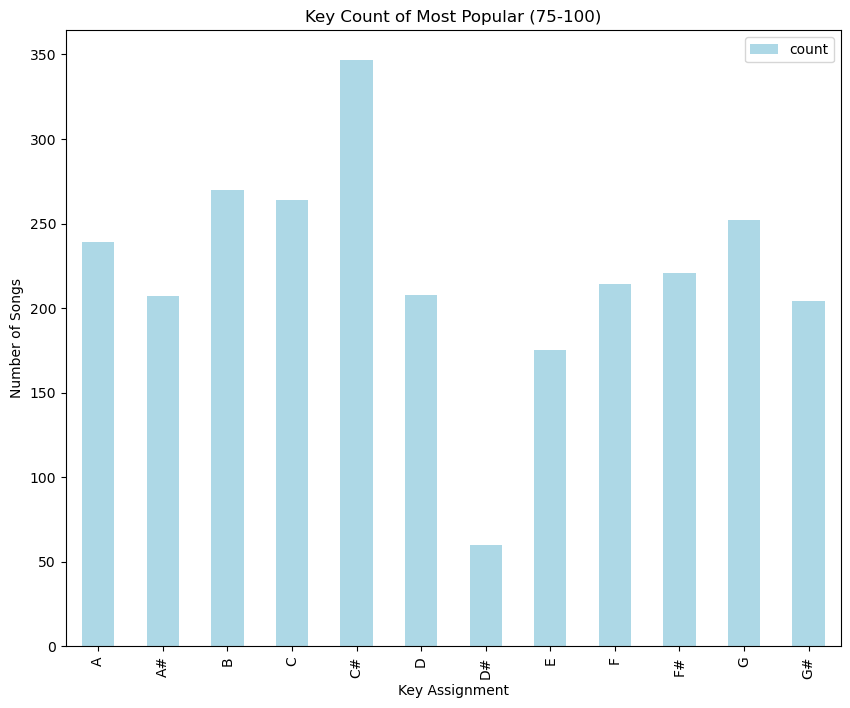

In [18]:
bar_1= key_group_2.loc['Most Popular (75-100)']
bar_1.plot(kind='bar', figsize=(10,8), title= 'Key Count of Most Popular (75-100)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='lightblue')
plt.show()